In [3]:
# import all important dependencies for data exploration
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt


In [9]:
d_frame= pd.read_csv(r"C:\Users\tumel\OneDrive\Desktop\Twitter US Airline Sentiment\Tweets.csv")
d_frame.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


# General EDA Questions

In [101]:
#Identify Nan values in the dataset
print(d_frame.isna())


       tweet_id  airline_sentiment  airline_sentiment_confidence  \
0         False              False                         False   
1         False              False                         False   
2         False              False                         False   
3         False              False                         False   
4         False              False                         False   
...         ...                ...                           ...   
14635     False              False                         False   
14636     False              False                         False   
14637     False              False                         False   
14638     False              False                         False   
14639     False              False                         False   

       negativereason  negativereason_confidence  airline  \
0                True                       True    False   
1                True                      False    False   


In [111]:
#replace the nan values with 0
cleaned_frame= d_frame.fillna(0)
print(cleaned_frame)


                 tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \

In [119]:
cleaned_frame

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,0,0.0000,Virgin America,0,cairdin,0,0,@VirginAmerica What @dhepburn said.,0,2015-02-24 11:35:52 -0800,0,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,0,0.0000,Virgin America,0,jnardino,0,0,@VirginAmerica plus you've added commercials t...,0,2015-02-24 11:15:59 -0800,0,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,0,0.0000,Virgin America,0,yvonnalynn,0,0,@VirginAmerica I didn't today... Must mean I n...,0,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,0,jnardino,0,0,@VirginAmerica it's really aggressive to blast...,0,2015-02-24 11:15:36 -0800,0,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,0,jnardino,0,0,@VirginAmerica and it's a really big bad thing...,0,2015-02-24 11:14:45 -0800,0,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,0,0.0000,American,0,KristenReenders,0,0,@AmericanAir thank you we got on a different f...,0,2015-02-22 12:01:01 -0800,0,0
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,0,itsropes,0,0,@AmericanAir leaving over 20 minutes Late Flig...,0,2015-02-22 11:59:46 -0800,Texas,0
14637,569587242672398336,neutral,1.0000,0,0.0000,American,0,sanyabun,0,0,@AmericanAir Please bring American Airlines to...,0,2015-02-22 11:59:15 -0800,"Nigeria,lagos",0
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,0,SraJackson,0,0,"@AmericanAir you have my money, you change my ...",0,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [121]:
# Q1:How many total tweets are in the datasets?
tot_tweets= len(cleaned_frame)
print( f" this is the toal tweets in the dataset:{tot_tweets}")

 this is the toal tweets in the dataset:14640


In [127]:
# Q2: What are the unique sentiment categories?
uni_senti_cat = {
    "airline_sentiment":cleaned_frame["airline_sentiment"].unique(),
    "airline_sentiment_confidence":cleaned_frame["airline_sentiment_confidence"].unique(),
    "airline_sentiment_gold":cleaned_frame["airline_sentiment_gold"]
}
# display the resultss
for unique , sentiment in uni_senti_cat.items():
    print(f"{unique}:{sentiment}")

airline_sentiment:['neutral' 'positive' 'negative']
airline_sentiment_confidence:[1.     0.3486 0.6837 ... 0.6384 0.7094 0.3487]
airline_sentiment_gold:0        0
1        0
2        0
3        0
4        0
        ..
14635    0
14636    0
14637    0
14638    0
14639    0
Name: airline_sentiment_gold, Length: 14640, dtype: object


In [125]:
#Q3: Which airlines are included in the datset
print( cleaned_frame["airline"].unique())

['Virgin America' 'United' 'Southwest' 'Delta' 'US Airways' 'American']


In [135]:
# Q4: How many tweets does each airline have?
print(cleaned_frame["airline"].value_counts())

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64


In [137]:
#Q5 what is the average tweet length ( charecters / words)?
avg_char_length =cleaned_frame["text"].apply(len).mean()
print(f"Average tweet length (characters): {avg_char_length:.2f}")


Average tweet length (characters): 103.82


## Intermediate Questions

In [139]:
#Q6 : which words appear most often in postive vs negative tweets?
positive_tweets = cleaned_frame[cleaned_frame['airline_sentiment'] == 'positive']['text']
negative_tweets = cleaned_frame[cleaned_frame['airline_sentiment'] == 'negative']['text']
print(f'Postive Tweets:{positive_tweets}')
print(f'Negative Tweets:{negative_tweets}')

Postive Tweets:1        @VirginAmerica plus you've added commercials t...
6        @VirginAmerica yes, nearly every time I fly VX...
8          @virginamerica Well, I didn't…but NOW I DO! :-D
9        @VirginAmerica it was amazing, and arrived an ...
11       @VirginAmerica I &lt;3 pretty graphics. so muc...
                               ...                        
14623    @AmericanAir Love the new planes for the JFK-L...
14625    @AmericanAir Flight 236 was great. Fantastic c...
14628    Thank you. “@AmericanAir: @jlhalldc Customer R...
14630                          @AmericanAir Thanks! He is.
14635    @AmericanAir thank you we got on a different f...
Name: text, Length: 2363, dtype: object
Negative Tweets:3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
15           @VirginAmerica SFO-PDX schedule is still MIA.
17       @VirginAmerica  I flew from NYC to 

In [145]:
#Q7  which airline has the highest proportion of negative tweets
sentiment_counts = cleaned_frame.groupby(['airline', 'airline_sentiment']).size().unstack(fill_value=0)
sentiment_counts['negative_ratio'] = sentiment_counts['negative'] / sentiment_counts.sum(axis=1)
highest_negative = sentiment_counts.sort_values(by='negative_ratio', ascending=False)
print(highest_negative[['negative', 'negative_ratio']])


airline_sentiment  negative  negative_ratio
airline                                    
US Airways             2263        0.776862
American               1960        0.710402
United                 2633        0.688906
Southwest              1186        0.490083
Delta                   955        0.429793
Virgin America          181        0.359127


In [157]:
# are tweets mentioning "delay " more likely to be negative
delay_tweets = cleaned_frame[cleaned_frame["text"].str.contains("delay", case=False, na=False)]
delay_sentiment_counts = delay_tweets["airline_sentiment"].value_counts(normalize=True)
print(delay_sentiment_counts)


airline_sentiment
negative    0.904167
neutral     0.050000
positive    0.045833
Name: proportion, dtype: float64


                    count        mean        std   min   25%    50%    75%  \
airline_sentiment                                                            
negative           9178.0  113.947919  30.719006  12.0  96.0  126.0  138.0   
neutral            3099.0   87.359471  37.682903  12.0  57.0   87.0  123.0   
positive           2363.0   86.082945  39.482103  12.0  52.0   86.0  124.0   

                     max  
airline_sentiment         
negative           176.0  
neutral            167.0  
positive           186.0  


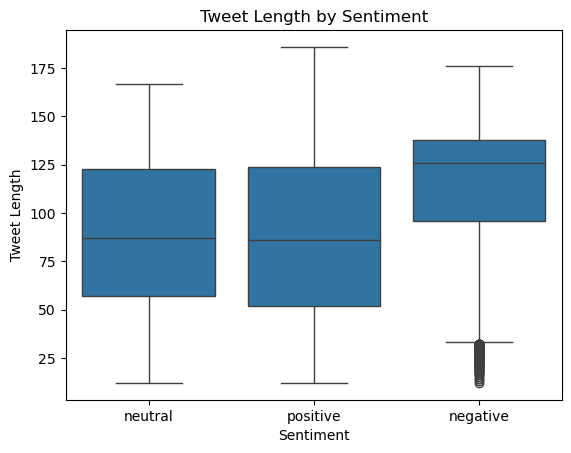

In [153]:

cleaned_frame["tweet_length"] = cleaned_frame["text"].str.len()
length_by_sentiment = cleaned_frame.groupby("airline_sentiment")["tweet_length"].describe()
print(length_by_sentiment)
sns.boxplot(x="airline_sentiment", y="tweet_length", data=d_frame)
plt.title("Tweet Length by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Length")
plt.show()


## Higher Order Questions

In [159]:
# Which issues (keywords like “baggage”, “late flight”) dominate per airline?
negative_tweets = d_frame[d_frame["airline_sentiment"] == "negative"]
issue_counts = negative_tweets.groupby(["airline", "negativereason"]).size().unstack(fill_value=0)
dominant_issues = issue_counts.idxmax(axis=1)
print(dominant_issues)


airline
American          Customer Service Issue
Delta                        Late Flight
Southwest         Customer Service Issue
US Airways        Customer Service Issue
United            Customer Service Issue
Virgin America    Customer Service Issue
dtype: object


In [163]:
#How does sentiment evolve over time ( day / hour?)
d_frame["tweet_created"] = pd.to_datetime(d_frame["tweet_created"])
d_frame["day"] = d_frame["tweet_created"].dt.date
d_frame["hour"] = d_frame["tweet_created"].dt.hour
daily_sentiment = d_frame.groupby(["day", "airline_sentiment"]).size().unstack(fill_value=0)
hourly_sentiment = d_frame.groupby(["hour", "airline_sentiment"]).size().unstack(fill_value=0)
print(daily_sentiment)
print( hourly_sentiment)

airline_sentiment  negative  neutral  positive
day                                           
2015-02-16                3        1         0
2015-02-17              838      297       273
2015-02-18              736      335       273
2015-02-19              751      329       296
2015-02-20              835      383       282
2015-02-21             1049      278       230
2015-02-22             2266      463       350
2015-02-23             1919      676       433
2015-02-24              781      337       226
airline_sentiment  negative  neutral  positive
hour                                          
0                        97       20        14
1                        80       23         8
2                       109       46        19
3                       146       46        33
4                       236       74        58
5                       313       97        67
6                       395      124       102
7                       475      170       131
8            

C:\Users\tumel\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\tumel\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\tumel\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tumel\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\tumel\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro


Cluster 0 top terms:
 - southwestair
 - flight
 - thanks
 - thank
 - cancelled
 - http
 - hold
 - just
 - flights
 - help

Cluster 1 top terms:
 - usairways
 - flight
 - hold
 - service
 - hours
 - help
 - thanks
 - cancelled
 - customer
 - just

Cluster 2 top terms:
 - united
 - flight
 - virginamerica
 - thanks
 - http
 - just
 - service
 - thank
 - time
 - customer

Cluster 3 top terms:
 - jetblue
 - http
 - flight
 - fleek
 - fleet
 - thanks
 - thank
 - jfk
 - just
 - rt

Cluster 4 top terms:
 - americanair
 - flight
 - cancelled
 - thanks
 - help
 - aa
 - flightled
 - service
 - dfw
 - hours


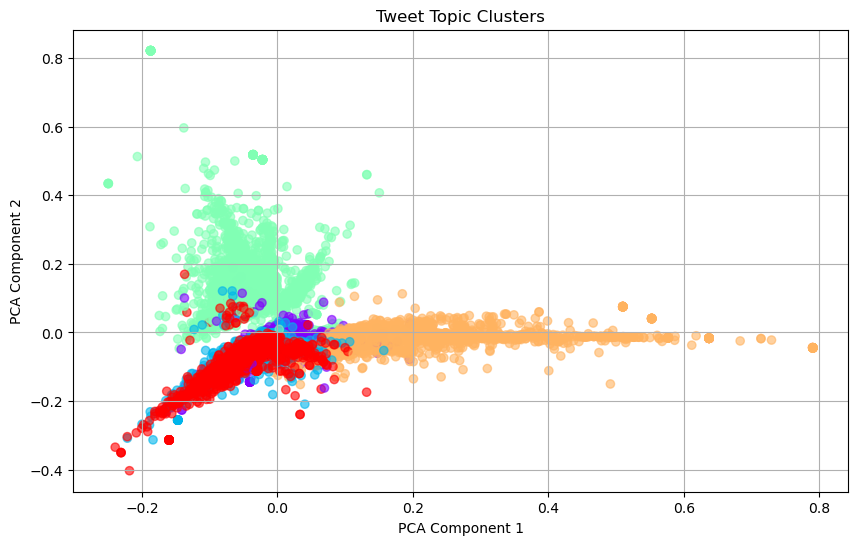

In [165]:
#Cluster tweets into topics ( delays ,service , staff ) usong TF-IDF + KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Extract tweet text
tweets = cleaned_frame["text"].dropna().values

# Vectorize tweets using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=5)
X = vectorizer.fit_transform(tweets)

#  Apply KMeans clustering
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

#  Assign cluster labels to the DataFrame
cleaned_frame["cluster"] = kmeans.labels_

#  Print top terms per cluster
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(num_clusters):
    print(f"\nCluster {i} top terms:")
    for j in range(10):
        print(f" - {terms[order_centroids[i, j]]}")

#  Optional — Visualize clusters using PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.6)
plt.title("Tweet Topic Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [171]:
#Can you predict sentiment from tweet text using a simple classifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


#Prepare features and labels
X = cleaned_frame["text"].fillna("")  # tweet text
y = cleaned_frame["airline_sentiment"]  # sentiment labels: positive, neutral, negative

#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#Train a simple classifier (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

#Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7950819672131147

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.93      0.88      1889
     neutral       0.65      0.48      0.55       580
    positive       0.79      0.63      0.70       459

    accuracy                           0.80      2928
   macro avg       0.76      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928

LogisticRegression(max_iter=1000)


# Graphicial EDA Questions


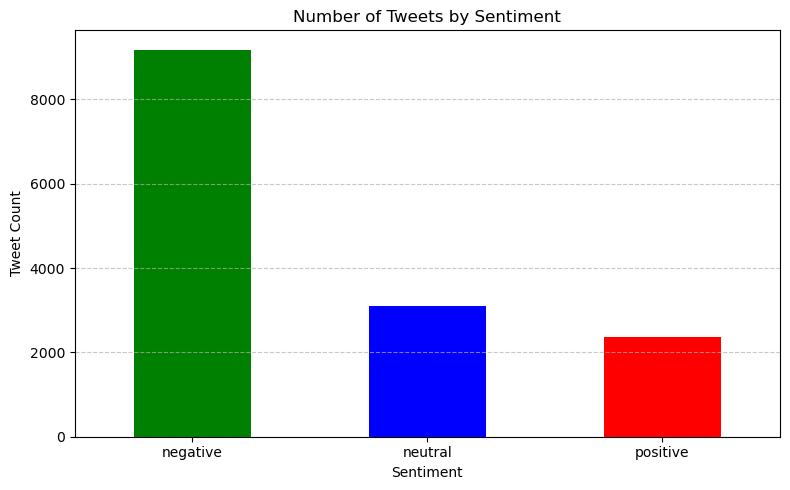

In [173]:
# plot a bar chart of tweets by sentiment
sentiment_counts = cleaned_frame["airline_sentiment"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title("Number of Tweets by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

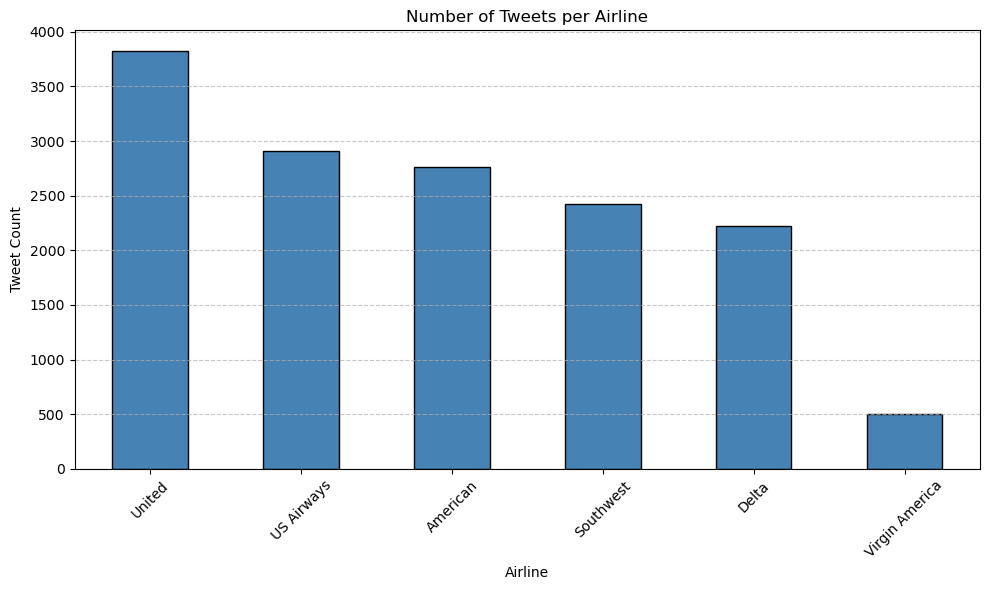

In [177]:
# PLOT THE NUMBER OF TWEETS PER AIRLINE ( BAR CHART)
# Count tweets per airline
airline_counts = cleaned_frame['airline'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
airline_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title("Number of Tweets per Airline")
plt.xlabel("Airline")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()